Méthode LOF

Confusion Matrix:
[[202  20]
 [108  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       222
           1       0.38      0.10      0.16       120

    accuracy                           0.63       342
   macro avg       0.51      0.50      0.46       342
weighted avg       0.55      0.63      0.55       342

Accuracy : 0.6257309941520468
Model: ROC AUC=0.519


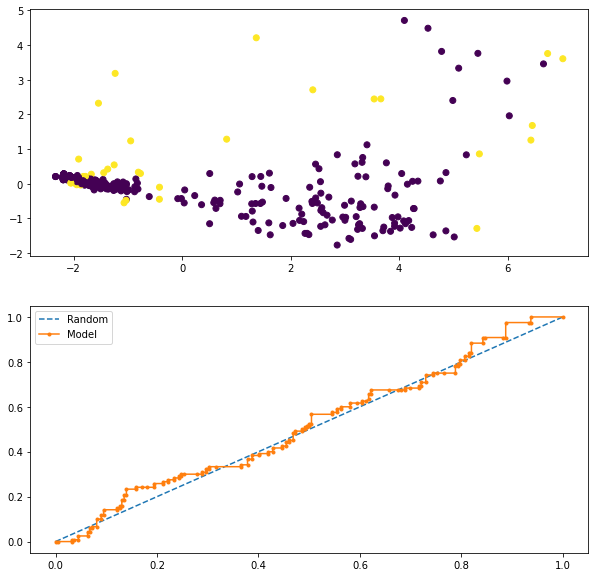

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
X=StandardScaler().fit_transform(X)
model=PCA(n_components=2)
X=model.fit_transform(X)

y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination='auto', metric='euclidean')
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
#clf.fit(X_train,y_train)
y_pred = clf.fit_predict(X_test)
X_scores = -clf.negative_outlier_factor_

y=np.reshape(y,(683,))
#y_pred=np.reshape(y_pred,(683,1))
y_pred[y_pred>0]=0
y_pred[y_pred<0]=1

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(X_test[:,0],X_test[:,1],c=y_pred)

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()


Méthode Kmeans

Confusion Matrix:
[[219   3]
 [ 18 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       222
           1       0.97      0.85      0.91       120

    accuracy                           0.94       342
   macro avg       0.95      0.92      0.93       342
weighted avg       0.94      0.94      0.94       342

Accuracy : 0.9385964912280702


NameError: name 'X_scores' is not defined

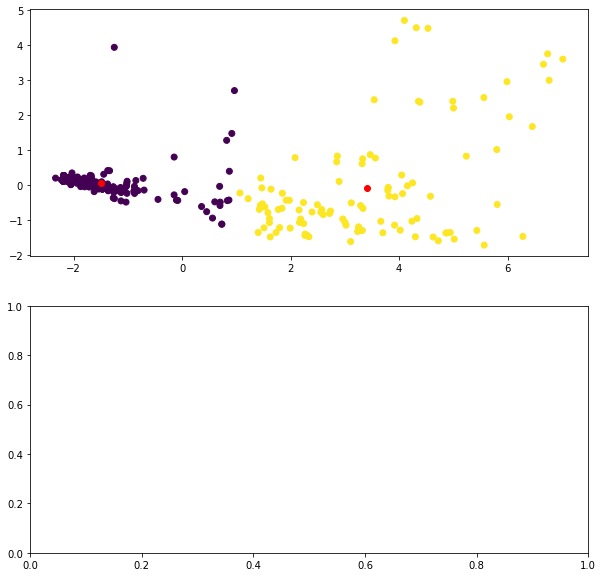

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
X=StandardScaler().fit_transform(X)
model=PCA(n_components=2)
X=model.fit_transform(X)
#plt.scatter(X[:,0],X[:,1],c=y)

y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred=kmeans.labels_

#X_scores ??

y_test=np.reshape(y_test,(len(y_test,)))


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
if result2 < 0.1 :
    y_pred[y_pred>0.5]=-1
    y_pred[y_pred>-0.5]=1
    y_pred[y_pred<0]=0
    result1 = classification_report(y_test, y_pred)
    result2 = accuracy_score(y_test,y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report:",)
print (result1)
print("Accuracy :",result2)


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(X_test[:,0], X_test[: , 1], c=kmeans.predict(X_test))
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r')

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()

"""
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters =k).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle')
"""


Méthode KernelDensity

Confusion Matrix:
[[199  23]
 [  0 120]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       222
           1       0.84      1.00      0.91       120

    accuracy                           0.93       342
   macro avg       0.92      0.95      0.93       342
weighted avg       0.94      0.93      0.93       342

Accuracy : 0.9327485380116959
Model: ROC AUC=0.948


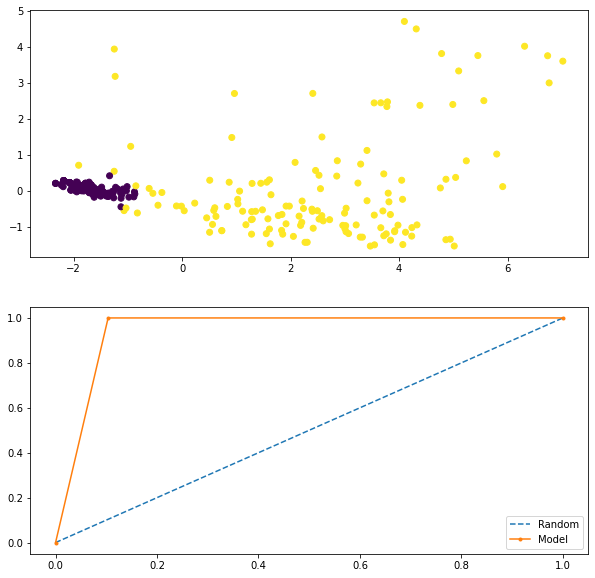

In [87]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
X=StandardScaler().fit_transform(X)
model=PCA(n_components=2)
X=model.fit_transform(X)
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_test)
X_scores=kde.score_samples(X_test)

y_pred=X_scores
y_pred[y_pred>-2.5]=0
y_pred[y_pred<-2.5]=1



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(X_test[:,0],X_test[:,1],c=y_pred)

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()

#print(model_fpr)
#print(model_tpr)
#print(_)



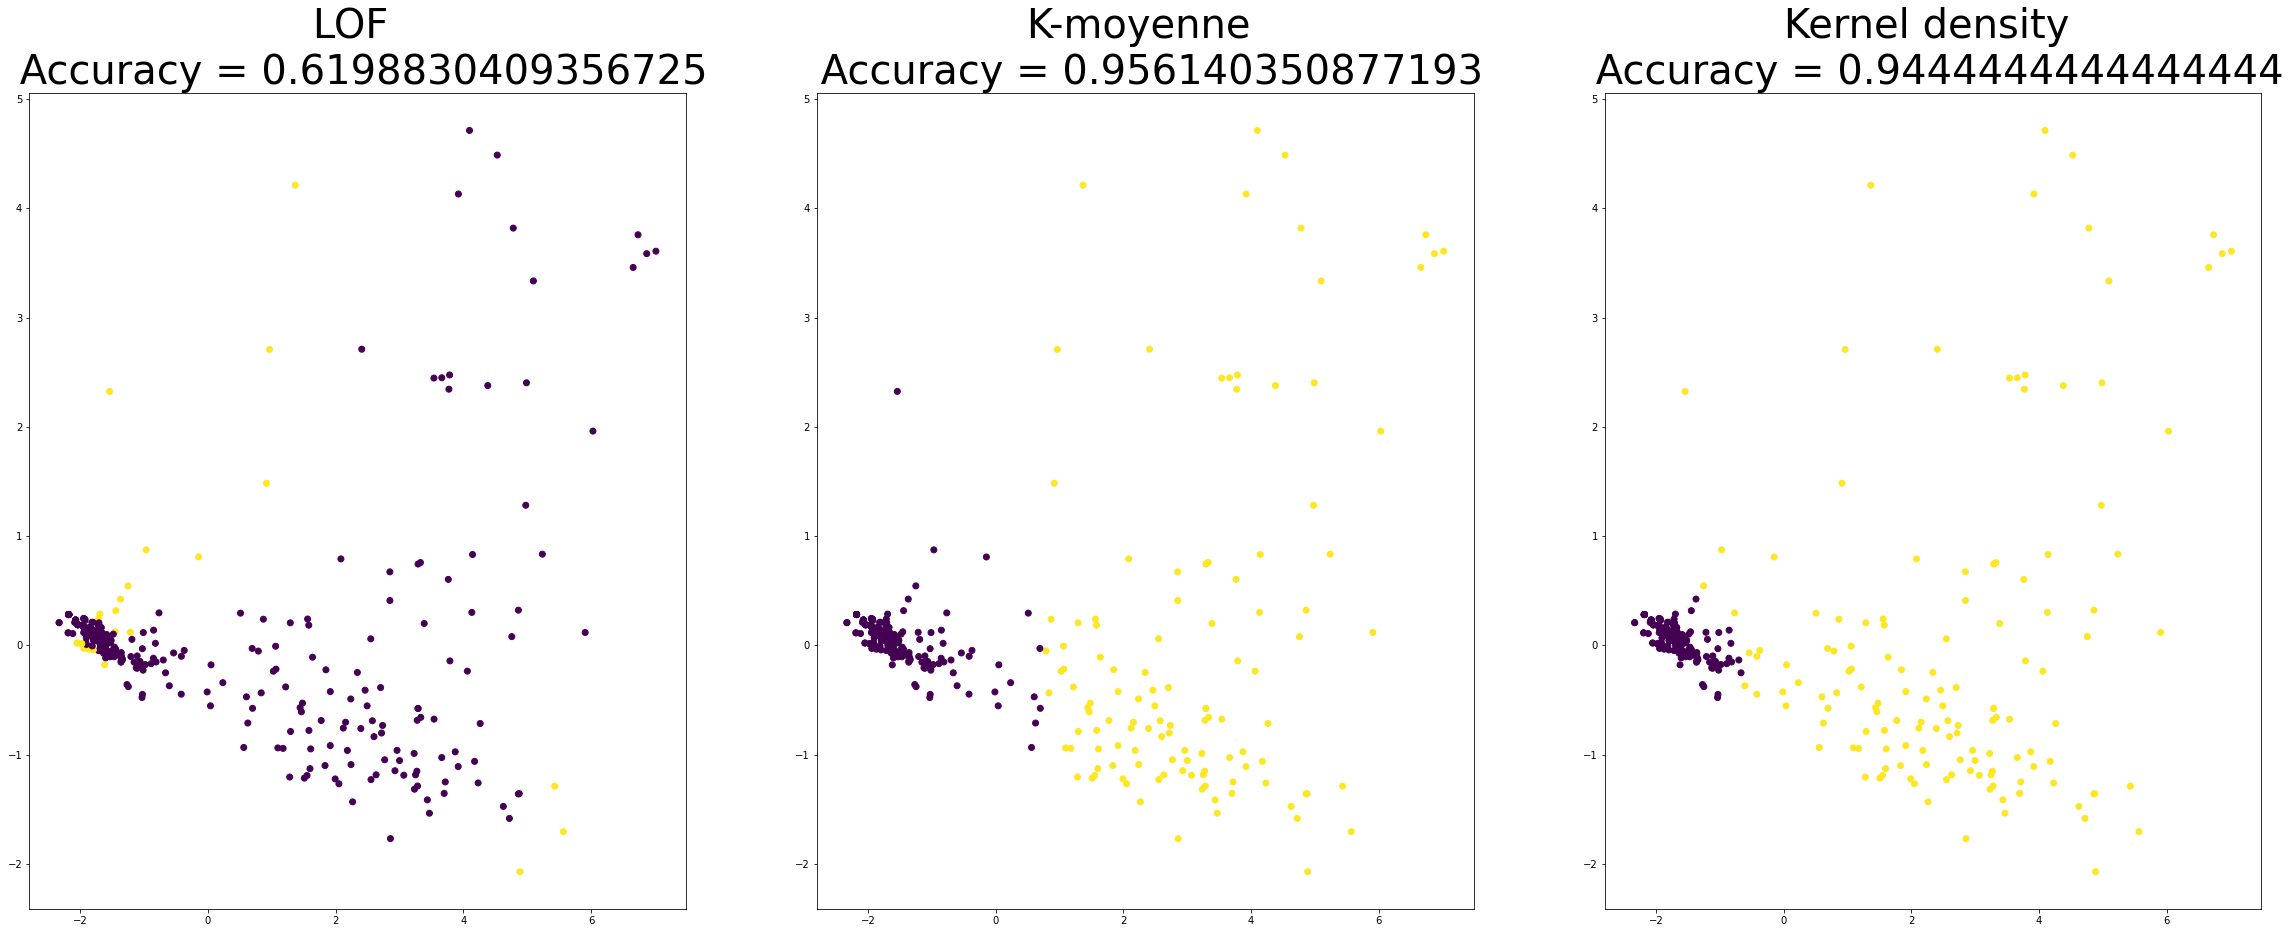

In [96]:
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
X=StandardScaler().fit_transform(X)
model=PCA(n_components=2)
X=model.fit_transform(X)
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_test)
X_scores=kde.score_samples(X_test)
y_pred_kde=X_scores
y_pred_kde[y_pred_kde>-2.5]=0
y_pred_kde[y_pred_kde<-2.5]=1

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred_kmeans=kmeans.labels_

clf = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination='auto', metric='euclidean')
y_pred_LOF = clf.fit_predict(X_test)
y_pred_LOF[y_pred_LOF>0]=0
y_pred_LOF[y_pred_LOF<0]=1

result_LOF = accuracy_score(y_test,y_pred_LOF)
result_kmeans = accuracy_score(y_test,y_pred_kmeans)
if result_kmeans < 0.1 :
    y_pred_kmeans[y_pred_kmeans>0.5]=-1
    y_pred_kmeans[y_pred_kmeans>-0.5]=1
    y_pred_kmeans[y_pred_kmeans<0]=0
    result_kmeans = accuracy_score(y_test,y_pred_kmeans)
result_kde = accuracy_score(y_test,y_pred_kde)


plt.figure(figsize = (40, 15))
plt.subplot(1,3,1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_LOF)
plt.title("LOF \n Accuracy = {}".format(result_LOF), size=40)
plt.subplot(1,3,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_kmeans)
plt.title("K-moyenne \n Accuracy = {}".format(result_kmeans), size=40)
plt.subplot(1,3,3)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_kde)
plt.title("Kernel density \n Accuracy = {}".format(result_kde), size=40)
plt.show()
